In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw=pd.read_csv('TCGA-ESCA-fpkm.csv')

C:\Users\liche\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_raw.head()

,EnsemblID,Gene name,Gene description,TCGA-2H-A9GG-01A,TCGA-2H-A9GH-01A,TCGA-2H-A9GI-01A,TCGA-2H-A9GJ-01A,TCGA-2H-A9GK-01A,TCGA-2H-A9GL-01A,TCGA-2H-A9GM-01A,...,TCGA-Z6-AAPN-01A,TCGA-IC-A6RE-11A,TCGA-L5-A43C-11A,TCGA-L5-A4OJ-11A,TCGA-L5-A4OO-11A,TCGA-L5-A4OQ-11A,TCGA-L5-A4OR-11A,TCGA-V5-A7RC-06A,TCGA-V5-A7RE-11A,TCGA-V5-AASX-11A
0,NaN,NaN,NaN,EAC,EAC,EAC,EAC,EAC,EAC,EAC,...,ESCC,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
1,ENSG00000242268,LINC02082,long intergenic non-protein coding RNA 2082 [S...,0.272250909,0,4.591987032,0.016866829,0.02371224,7.131495293,0.018744112,...,0,0,0.030093913,0.08960457,0.073287752,0.218497259,0,0.049046032,0.113244529,0.017578672
2,ENSG00000270112,AC090241.2,NaN,0.168537641,0,0,0,0.003290149,0.203499767,0.018205635,...,0.004174996,0,0.012526878,0.040406985,0.01694818,0.005684473,0.038207366,0.018147447,0.025140861,0.00731729
3,ENSG00000167578,RAB4B,"RAB4B, member RAS oncogene family [Source:HGNC...",4.751158957,3.545172138,2.71738274,2.348246425,5.148633837,1.590263199,4.262583313,...,3.478276149,1.879179686,1.421912569,2.387539589,1.304051637,1.411151258,2.120435045,1.645166099,3.618877503,1.176123418
4,ENSG00000078237,TIGAR,TP53 induced glycolysis regulatory phosphatase...,2.32652288,4.721272536,8.982845752,5.565830309,5.134802079,4.271327505,11.69705726,...,7.307247806,2.677119913,1.434811694,1.930885106,2.117174776,3.107921135,1.513352935,2.134900368,5.096041283,2.175789469


In [4]:
df=df_raw.copy()

In [5]:
df=df.drop(['EnsemblID', 'Gene description'], axis=1)

In [6]:
df.head()

,Gene name,TCGA-2H-A9GG-01A,TCGA-2H-A9GH-01A,TCGA-2H-A9GI-01A,TCGA-2H-A9GJ-01A,TCGA-2H-A9GK-01A,TCGA-2H-A9GL-01A,TCGA-2H-A9GM-01A,TCGA-2H-A9GN-01A,TCGA-2H-A9GO-01A,...,TCGA-Z6-AAPN-01A,TCGA-IC-A6RE-11A,TCGA-L5-A43C-11A,TCGA-L5-A4OJ-11A,TCGA-L5-A4OO-11A,TCGA-L5-A4OQ-11A,TCGA-L5-A4OR-11A,TCGA-V5-A7RC-06A,TCGA-V5-A7RE-11A,TCGA-V5-AASX-11A
0,NaN,EAC,EAC,EAC,EAC,EAC,EAC,EAC,EAC,EAC,...,ESCC,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
1,LINC02082,0.272250909,0,4.591987032,0.016866829,0.02371224,7.131495293,0.018744112,0.016692686,0.248693436,...,0,0,0.030093913,0.08960457,0.073287752,0.218497259,0,0.049046032,0.113244529,0.017578672
2,AC090241.2,0.168537641,0,0,0,0.003290149,0.203499767,0.018205635,0.002316163,0.002300467,...,0.004174996,0,0.012526878,0.040406985,0.01694818,0.005684473,0.038207366,0.018147447,0.025140861,0.00731729
3,RAB4B,4.751158957,3.545172138,2.71738274,2.348246425,5.148633837,1.590263199,4.262583313,1.116845419,3.818184365,...,3.478276149,1.879179686,1.421912569,2.387539589,1.304051637,1.411151258,2.120435045,1.645166099,3.618877503,1.176123418
4,TIGAR,2.32652288,4.721272536,8.982845752,5.565830309,5.134802079,4.271327505,11.69705726,8.56639047,4.957031389,...,7.307247806,2.677119913,1.434811694,1.930885106,2.117174776,3.107921135,1.513352935,2.134900368,5.096041283,2.175789469


In [7]:
df=df.set_index(['Gene name'])

In [8]:
df.head()

,TCGA-2H-A9GG-01A,TCGA-2H-A9GH-01A,TCGA-2H-A9GI-01A,TCGA-2H-A9GJ-01A,TCGA-2H-A9GK-01A,TCGA-2H-A9GL-01A,TCGA-2H-A9GM-01A,TCGA-2H-A9GN-01A,TCGA-2H-A9GO-01A,TCGA-2H-A9GQ-01A,...,TCGA-Z6-AAPN-01A,TCGA-IC-A6RE-11A,TCGA-L5-A43C-11A,TCGA-L5-A4OJ-11A,TCGA-L5-A4OO-11A,TCGA-L5-A4OQ-11A,TCGA-L5-A4OR-11A,TCGA-V5-A7RC-06A,TCGA-V5-A7RE-11A,TCGA-V5-AASX-11A
Gene name,,,,,,,,,,,,,,,,,,,,,
NaN,EAC,EAC,EAC,EAC,EAC,EAC,EAC,EAC,EAC,EAC,...,ESCC,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
LINC02082,0.272250909,0,4.591987032,0.016866829,0.02371224,7.131495293,0.018744112,0.016692686,0.248693436,0.023713942,...,0,0,0.030093913,0.08960457,0.073287752,0.218497259,0,0.049046032,0.113244529,0.017578672
AC090241.2,0.168537641,0,0,0,0.003290149,0.203499767,0.018205635,0.002316163,0.002300467,0,...,0.004174996,0,0.012526878,0.040406985,0.01694818,0.005684473,0.038207366,0.018147447,0.025140861,0.00731729
RAB4B,4.751158957,3.545172138,2.71738274,2.348246425,5.148633837,1.590263199,4.262583313,1.116845419,3.818184365,1.817546845,...,3.478276149,1.879179686,1.421912569,2.387539589,1.304051637,1.411151258,2.120435045,1.645166099,3.618877503,1.176123418
TIGAR,2.32652288,4.721272536,8.982845752,5.565830309,5.134802079,4.271327505,11.69705726,8.56639047,4.957031389,4.906816975,...,7.307247806,2.677119913,1.434811694,1.930885106,2.117174776,3.107921135,1.513352935,2.134900368,5.096041283,2.175789469


In [9]:
df=df.transpose()

In [10]:
df.head()

Gene name,NaN,LINC02082,AC090241.2,RAB4B,TIGAR,RNF44,NUP210P2,DNAH3,RPL23A,EHD4-AS1,...,TENM1,GABARAPL3,CYP4F2,AL590824.1,AC010525.1,AC097724.1,PPP6R1,AL031666.1,BATF3,OR8D4
TCGA-2H-A9GG-01A,EAC,0.272250909,0.168537641,4.751158957,2.32652288,12.97498694,0,0.434344351,144.8051206,0.134998206,...,0.154502,0,0.899149,0,0.910352,0.17452,21.8508,0.526048,0.833064,0
TCGA-2H-A9GH-01A,EAC,0,0,3.545172138,4.721272536,10.36483186,0,0.770812072,130.1982598,0.102160885,...,0.0256527,0,0.190523,0,0.392937,0,25.5622,0.29608,0.174197,0
TCGA-2H-A9GI-01A,EAC,4.591987032,0,2.71738274,8.982845752,13.74733713,0,0.361338471,215.5318405,0.091529828,...,0.0153222,0,0.193156,0,0.864116,0.0331312,15.0787,0.187249,0.395376,0
TCGA-2H-A9GJ-01A,EAC,0.016866829,0,2.348246425,5.565830309,19.48443542,0,0.695632665,151.3808631,0.434906038,...,5.53084,0,1.15486,0,0.162931,0.140557,34.7221,0.0992989,0.180978,0.00899733
TCGA-2H-A9GK-01A,EAC,0.02371224,0.003290149,5.148633837,5.134802079,15.74702222,0,0.078776627,134.1489762,0.807938457,...,0.0274154,0,0.0267914,0,1.41252,0.0790408,44.1032,0.186133,1.68791,0


In [11]:
df=df.reset_index()

In [12]:
df.head()

Gene name,index,NaN,LINC02082,AC090241.2,RAB4B,TIGAR,RNF44,NUP210P2,DNAH3,RPL23A,...,TENM1,GABARAPL3,CYP4F2,AL590824.1,AC010525.1,AC097724.1,PPP6R1,AL031666.1,BATF3,OR8D4
0,TCGA-2H-A9GG-01A,EAC,0.272250909,0.168537641,4.751158957,2.32652288,12.97498694,0,0.434344351,144.8051206,...,0.154502,0,0.899149,0,0.910352,0.17452,21.8508,0.526048,0.833064,0
1,TCGA-2H-A9GH-01A,EAC,0,0,3.545172138,4.721272536,10.36483186,0,0.770812072,130.1982598,...,0.0256527,0,0.190523,0,0.392937,0,25.5622,0.29608,0.174197,0
2,TCGA-2H-A9GI-01A,EAC,4.591987032,0,2.71738274,8.982845752,13.74733713,0,0.361338471,215.5318405,...,0.0153222,0,0.193156,0,0.864116,0.0331312,15.0787,0.187249,0.395376,0
3,TCGA-2H-A9GJ-01A,EAC,0.016866829,0,2.348246425,5.565830309,19.48443542,0,0.695632665,151.3808631,...,5.53084,0,1.15486,0,0.162931,0.140557,34.7221,0.0992989,0.180978,0.00899733
4,TCGA-2H-A9GK-01A,EAC,0.02371224,0.003290149,5.148633837,5.134802079,15.74702222,0,0.078776627,134.1489762,...,0.0274154,0,0.0267914,0,1.41252,0.0790408,44.1032,0.186133,1.68791,0


In [13]:
df=df.drop(['index'], axis=1)

In [14]:
df.head()

Gene name,NaN,LINC02082,AC090241.2,RAB4B,TIGAR,RNF44,NUP210P2,DNAH3,RPL23A,EHD4-AS1,...,TENM1,GABARAPL3,CYP4F2,AL590824.1,AC010525.1,AC097724.1,PPP6R1,AL031666.1,BATF3,OR8D4
0,EAC,0.272250909,0.168537641,4.751158957,2.32652288,12.97498694,0,0.434344351,144.8051206,0.134998206,...,0.154502,0,0.899149,0,0.910352,0.17452,21.8508,0.526048,0.833064,0
1,EAC,0,0,3.545172138,4.721272536,10.36483186,0,0.770812072,130.1982598,0.102160885,...,0.0256527,0,0.190523,0,0.392937,0,25.5622,0.29608,0.174197,0
2,EAC,4.591987032,0,2.71738274,8.982845752,13.74733713,0,0.361338471,215.5318405,0.091529828,...,0.0153222,0,0.193156,0,0.864116,0.0331312,15.0787,0.187249,0.395376,0
3,EAC,0.016866829,0,2.348246425,5.565830309,19.48443542,0,0.695632665,151.3808631,0.434906038,...,5.53084,0,1.15486,0,0.162931,0.140557,34.7221,0.0992989,0.180978,0.00899733
4,EAC,0.02371224,0.003290149,5.148633837,5.134802079,15.74702222,0,0.078776627,134.1489762,0.807938457,...,0.0274154,0,0.0267914,0,1.41252,0.0790408,44.1032,0.186133,1.68791,0


In [15]:
df=df.rename(columns={np.nan:'disease'})

In [16]:
df.head(10)

Gene name,disease,LINC02082,AC090241.2,RAB4B,TIGAR,RNF44,NUP210P2,DNAH3,RPL23A,EHD4-AS1,...,TENM1,GABARAPL3,CYP4F2,AL590824.1,AC010525.1,AC097724.1,PPP6R1,AL031666.1,BATF3,OR8D4
0,EAC,0.272250909,0.168537641,4.751158957,2.32652288,12.97498694,0,0.434344351,144.8051206,0.134998206,...,0.154502,0,0.899149,0,0.910352,0.17452,21.8508,0.526048,0.833064,0
1,EAC,0,0,3.545172138,4.721272536,10.36483186,0,0.770812072,130.1982598,0.102160885,...,0.0256527,0,0.190523,0,0.392937,0,25.5622,0.29608,0.174197,0
2,EAC,4.591987032,0,2.71738274,8.982845752,13.74733713,0,0.361338471,215.5318405,0.091529828,...,0.0153222,0,0.193156,0,0.864116,0.0331312,15.0787,0.187249,0.395376,0
3,EAC,0.016866829,0,2.348246425,5.565830309,19.48443542,0,0.695632665,151.3808631,0.434906038,...,5.53084,0,1.15486,0,0.162931,0.140557,34.7221,0.0992989,0.180978,0.00899733
4,EAC,0.02371224,0.003290149,5.148633837,5.134802079,15.74702222,0,0.078776627,134.1489762,0.807938457,...,0.0274154,0,0.0267914,0,1.41252,0.0790408,44.1032,0.186133,1.68791,0
5,EAC,7.131495293,0.203499767,1.590263199,4.271327505,21.40109349,0,0.431558257,236.3592871,0.067529722,...,0.0595506,0,0.285846,0,1.21014,0.244439,24.2453,0.928198,0.575733,0.00977938
6,EAC,0.018744112,0.018205635,4.262583313,11.69705726,14.22297223,0,0.085400979,213.0367838,0.103566686,...,0.0330231,0,0.122833,0,3.07811,0.531083,22.4602,0.434047,0.622984,0
7,EAC,0.016692686,0.002316163,1.116845419,8.56639047,22.39698377,0,0.090314572,123.7850739,1.060667556,...,0.030328,0,0.150882,0,0.591247,0.111285,32.0699,0.262063,0.908653,0
8,EAC,0.248693436,0.002300467,3.818184365,4.957031389,14.87034427,0,0.255730884,122.6961005,0.04580346,...,3.10079,0,0.0487044,0,3.3099,0.414489,21.4079,0.273302,0.386164,0.0176882
9,EAC,0.023713942,0,1.817546845,4.906816975,10.56916977,0,1.22450172,92.97259123,0.131026449,...,0.0169727,0,0.00535866,0.012481,0.458147,0,16.4072,0.316448,0.484069,0


In [17]:
df.disease.value_counts()

ESCC      83
EAC       81
Normal     9
Name: disease, dtype: int64

In [18]:
df.isnull().sum()

Gene name
disease       0
LINC02082     0
AC090241.2    0
RAB4B         0
TIGAR         0
             ..
AC097724.1    0
PPP6R1        0
AL031666.1    0
BATF3         0
OR8D4         0
Length: 56872, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Columns: 56872 entries, disease to OR8D4
dtypes: object(56872)
memory usage: 75.1+ MB


## EAC:1

## ESCC:2

## Noamal:0

In [20]:
df['disease']=df['disease'].map({'EAC':1, 'ESCC':2, 'Normal':0})

In [21]:
df.head()

Gene name,disease,LINC02082,AC090241.2,RAB4B,TIGAR,RNF44,NUP210P2,DNAH3,RPL23A,EHD4-AS1,...,TENM1,GABARAPL3,CYP4F2,AL590824.1,AC010525.1,AC097724.1,PPP6R1,AL031666.1,BATF3,OR8D4
0,1,0.272250909,0.168537641,4.751158957,2.32652288,12.97498694,0,0.434344351,144.8051206,0.134998206,...,0.154502,0,0.899149,0,0.910352,0.17452,21.8508,0.526048,0.833064,0
1,1,0,0,3.545172138,4.721272536,10.36483186,0,0.770812072,130.1982598,0.102160885,...,0.0256527,0,0.190523,0,0.392937,0,25.5622,0.29608,0.174197,0
2,1,4.591987032,0,2.71738274,8.982845752,13.74733713,0,0.361338471,215.5318405,0.091529828,...,0.0153222,0,0.193156,0,0.864116,0.0331312,15.0787,0.187249,0.395376,0
3,1,0.016866829,0,2.348246425,5.565830309,19.48443542,0,0.695632665,151.3808631,0.434906038,...,5.53084,0,1.15486,0,0.162931,0.140557,34.7221,0.0992989,0.180978,0.00899733
4,1,0.02371224,0.003290149,5.148633837,5.134802079,15.74702222,0,0.078776627,134.1489762,0.807938457,...,0.0274154,0,0.0267914,0,1.41252,0.0790408,44.1032,0.186133,1.68791,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Columns: 56872 entries, disease to OR8D4
dtypes: int64(1), object(56871)
memory usage: 75.1+ MB


In [68]:
df.disease.value_counts()

2    83
1    81
0     9
Name: disease, dtype: int64

In [69]:
EAC = df[df.disease==1]
ESCC = df[df.disease==2]
Normal = df[df.disease==0]

([<matplotlib.patches.Wedge at 0x1f0b6657bc8>,
 [Text(0.10968233672271449, 1.0945180606143716, 'EAC'),
  Text(-0.28630845442934694, -1.062086375452712, 'ESCC'),
  Text(1.0853415497990753, -0.17897966443074373, 'Normal')])

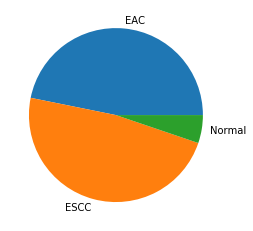

In [72]:
plt.pie([len(EAC), len(ESCC), len(Normal)], labels=['EAC', 'ESCC', 'Normal'])

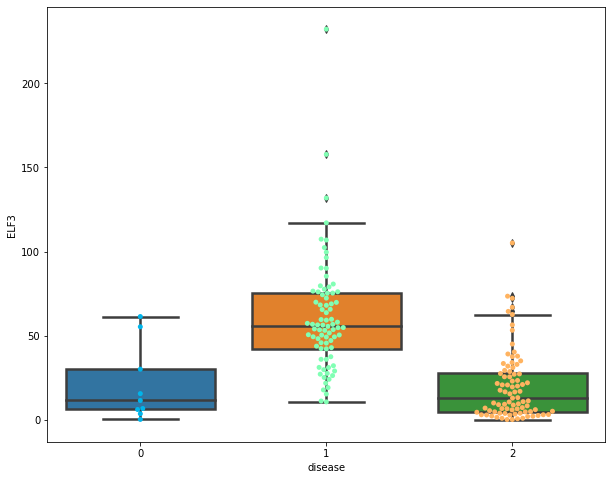

In [158]:
plt.figure(figsize=(10,8))
sns.boxplot(x='disease', y='ELF3', data=df, linewidth=2.5)
sns.swarmplot(x='disease', y='ELF3', data=df, palette='rainbow')

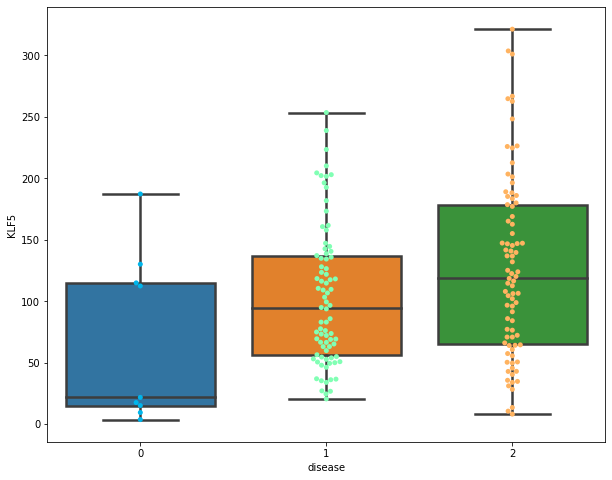

In [160]:
plt.figure(figsize=(10,8))
sns.boxplot(x='disease', y='KLF5', data=df, linewidth=2.5)
sns.swarmplot(x='disease', y='KLF5', data=df, palette='rainbow')

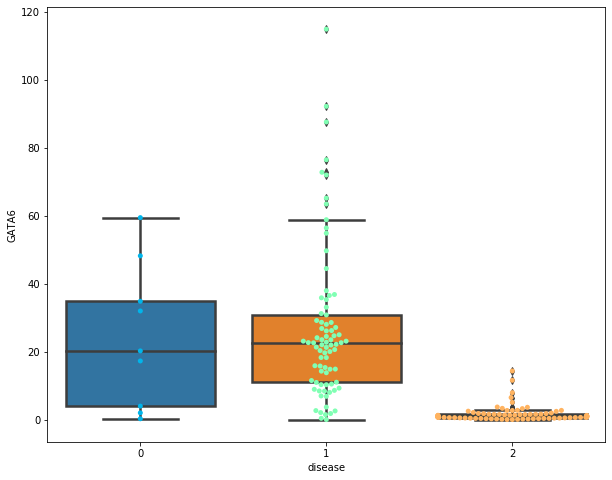

In [166]:
plt.figure(figsize=(10,8))
sns.boxplot(x='disease', y='GATA6', data=df, linewidth=2.5)
sns.swarmplot(x='disease', y='GATA6', data=df, palette='rainbow')

# Train Test Split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X=df.drop('disease', axis=1)

In [77]:
y=df['disease']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Scaling

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler=MinMaxScaler()

In [79]:
X_train=scaler.fit_transform(X_train)

In [80]:
X_train=scaler.fit_transform(X_train)

In [81]:
X_train.shape

(138, 56871)

In [82]:
X_test.shape

(35, 56871)

# Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
logmodel=LogisticRegression()

In [85]:
logmodel.fit(X_train, y_train)

C:\Users\liche\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liche\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
print('Logistic Regression Test Accuracy {:.2f}%'.format(logmodel.score(X_test, y_test)*100))

Logistic Regression Test Accuracy 97.14%


In [90]:
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
predictions=logmodel.predict(X_test)

In [92]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.95      1.00      0.97        19
           2       1.00      1.00      1.00        15

    accuracy                           0.97        35
   macro avg       0.65      0.67      0.66        35
weighted avg       0.94      0.97      0.96        35



C:\Users\liche\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# KNN model

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn=KNeighborsClassifier(n_neighbors=3)

In [95]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [96]:
print('KNN accuracy: {:.2f}%'.format(knn.score(X_test, y_test)*100))

KNN accuracy: 97.14%


# support vector

In [97]:
from sklearn.svm import SVC

In [104]:
svm = SVC(random_state = 2)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)
print('SVC accuracy: {:.2f}%'.format(svm.score(X_test, y_test)*100))

C:\Users\liche\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC accuracy: 42.86%


# Naive Bayes

In [105]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print('NB accuracy: {:.2f}%'.format(nb.score(X_test, y_test)*100))

NB accuracy: 51.43%


# Random forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
print('Random Forest accuracy: {:.2f}%'.format(rf.score(X_test, y_test)*100))

Random Forest accuracy: 97.14%


# XG boost

In [107]:
import xgboost
xg = xgboost.XGBClassifier()
xg.fit(X_train, y_train)
print('XGboost accuracy: {:.2f}%'.format(xg.score(X_test, y_test)*100))

XGboost accuracy: 94.29%


# Keras Classification

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [117]:
X_train.shape

(138, 56871)

In [134]:
model = Sequential()

model.add(Dense(56871, activation = 'relu'))
model.add(Dense(30000, activation = 'relu'))
model.add(Dense(15000, activation = 'relu'))
model.add(Dense(75000, activation = 'relu'))
model.add(Dense(32000, activation = 'relu'))
model.add(Dense(16000, activation = 'relu'))
model.add(Dense(8000, activation = 'relu'))
model.add(Dense(4000, activation = 'relu'))
model.add(Dense(2000, activation = 'relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(250, activation = 'relu'))
model.add(Dense(125, activation = 'relu'))
model.add(Dense(60, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam')